In [7]:
import pandas as pd
#dataset load
df=pd.read_csv(r"C:\Users\Prarthana\Downloads\Machine-Learning-Project-for-TCS-master\Machine-Learning-Project-for-TCS-master\TCS.csv")


In [8]:
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TCS,EQ,15-May-2017,2360.65,2375.1,2377.95,2341.60,2368.00,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39
1,TCS,EQ,16-May-2017,2365.10,2380.0,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84
2,TCS,EQ,17-May-2017,2429.15,2433.5,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74
3,TCS,EQ,18-May-2017,2455.35,2450.0,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,6.489478e+09,111566,1135613,44.20
4,TCS,EQ,19-May-2017,2536.20,2536.2,2540.55,2486.00,2503.85,2507.15,2506.58,893022,2.238430e+09,63112,517461,57.94


In [17]:
data_available_from=df['Date'][0]
data_available_to=df['Date'][497]


In [18]:
print(f'data_available_from: '+data_available_from+' data_available_to: '+data_available_to)


data_available_from: 15-May-2017 data_available_to: 13-May-2019


In [13]:
import matplotlib.pyplot as plt

In [15]:
df1=df[['Open Price','High Price','Low Price','Close Price']]

In [16]:
df1

,Open Price,High Price,Low Price,Close Price
0,2375.10,2377.95,2341.60,2365.10
1,2380.00,2435.00,2373.45,2429.15
2,2433.50,2460.75,2423.00,2455.35
3,2450.00,2572.00,2442.25,2536.20
4,2536.20,2540.55,2486.00,2507.15
...,...,...,...,...
493,2160.05,2184.35,2138.80,2151.95
494,2151.00,2168.00,2130.40,2152.85
495,2145.00,2184.10,2136.10,2172.55
496,2175.00,2192.00,2125.85,2135.80


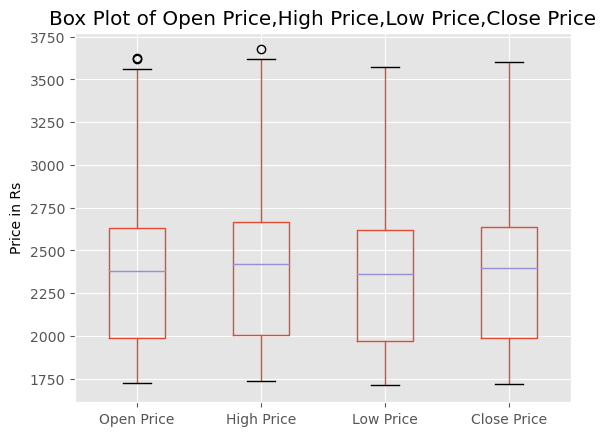

In [19]:
plt.style.use('ggplot')
df1[['Open Price','High Price','Low Price','Close Price']].boxplot()
plt.title('Box Plot of Open Price,High Price,Low Price,Close Price')
plt.ylabel('Price in Rs')
plt.show()

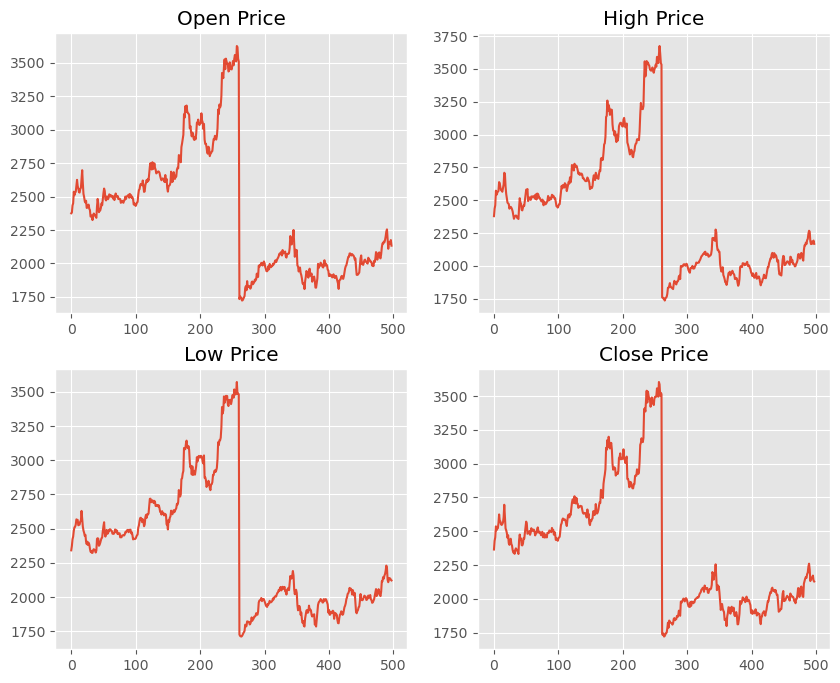

In [20]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.plot(df1['Open Price'])
plt.title('Open Price')
plt.subplot(2,2,2) 
plt.plot(df1['High Price'])
plt.title('High Price')
plt.subplot(2,2,3)
plt.plot(df1['Low Price'])
plt.title('Low Price')
plt.subplot(2,2,4)
plt.plot(df1['Close Price'])
plt.title('Close Price')
plt.show()

In [21]:
df1=df1[['Close Price']]
df1

,Close Price
0,2365.10
1,2429.15
2,2455.35
3,2536.20
4,2507.15
...,...
493,2151.95
494,2152.85
495,2172.55
496,2135.80


In [22]:
#NORMALIZATION
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [23]:
df1

array([[0.34190532],
       [0.37593645],
       [0.38985707],
       [0.43281441],
       [0.41737952],
       [0.4302375 ],
       [0.42511025],
       [0.44500824],
       [0.47978322],
       [0.45515647],
       [0.45228734],
       [0.4407311 ],
       [0.43834015],
       [0.4420594 ],
       [0.44806333],
       [0.46881143],
       [0.51771957],
       [0.47481537],
       [0.42505712],
       [0.41729982],
       [0.40677966],
       [0.38783805],
       [0.3977472 ],
       [0.36639923],
       [0.36028904],
       [0.37729132],
       [0.3843579 ],
       [0.36379576],
       [0.35771213],
       [0.34009883],
       [0.33008342],
       [0.33390893],
       [0.32498273],
       [0.34044418],
       [0.34642155],
       [0.34283513],
       [0.33707029],
       [0.33258063],
       [0.32429201],
       [0.37901812],
       [0.4007226 ],
       [0.38140906],
       [0.38510175],
       [0.35909357],
       [0.35803092],
       [0.36488497],
       [0.38680198],
       [0.384

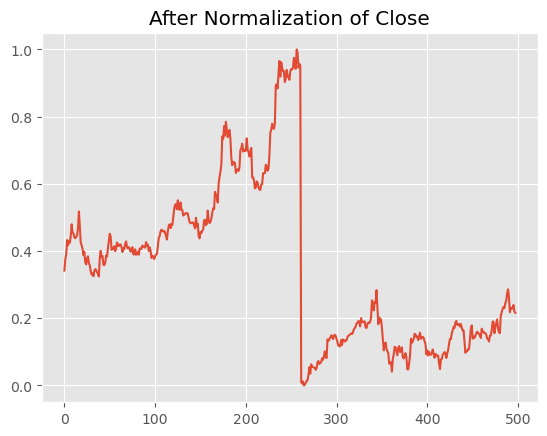

In [24]:
plt.plot(df1)
plt.title('After Normalization of Close')
plt.show()

In [25]:
training_size=int(len(df1)*0.65)
test_size=int(len(df1))-training_size

In [26]:
training_size

323

In [27]:
test_size

175

In [28]:
len(df)

498

In [29]:
train_data=df1[:training_size,:]

In [30]:
train_data.shape

(323, 1)

In [31]:
len(train_data)

323

In [32]:
test_data=df1[training_size:,:1]

In [33]:
td=np.empty_like(df1)
td[:,:]=np.nan
td[training_size:]=test_data

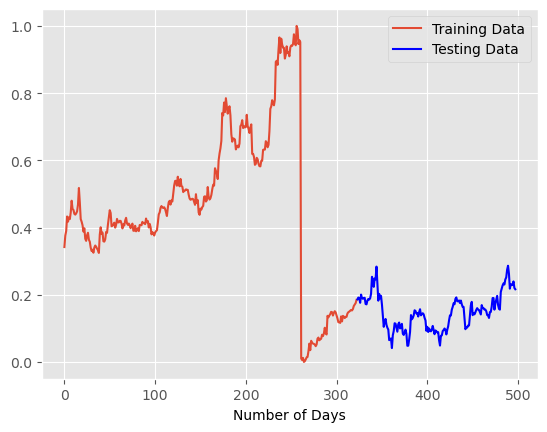

In [34]:
plt.plot(df1[:training_size,:])
plt.plot(td,color='Blue')
plt.legend(['Training Data','Testing Data'])
plt.xlabel('Number of Days')
plt.show()

In [35]:
#Preperaing Dataset X_train and X_test as (-1,100) and y_train and y_test as (-1,1)
def creating_dataset(df,window=1):
    dataX,dataY=[],[]
    for i in range(len(df)-window-1):
        a=df[i:i+window,0]
        dataX.append(a)
        dataY.append(df[i+window,0])
    return np.array(dataX),np.array(dataY)

In [36]:
X_train,y_train=creating_dataset(train_data,100)
X_test,y_test=creating_dataset(test_data,100)

In [37]:
X_train.shape,y_train.shape

((222, 100), (222,))

In [38]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [39]:
X_train.shape

(222, 100, 1)

In [40]:
X_test.shape

(74, 100, 1)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [42]:
model=Sequential()

In [43]:
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.fit(X_train,y_train,epochs=10,batch_size=64)

Epoch 1/10
4/4 [==============================] - 10s 175ms/step - loss: 0.2268 - accuracy: 0.0045
Epoch 2/10
4/4 [==============================] - 1s 166ms/step - loss: 0.0632 - accuracy: 0.0045
Epoch 3/10
4/4 [==============================] - 1s 150ms/step - loss: 0.0512 - accuracy: 0.0045
Epoch 4/10
4/4 [==============================] - 1s 155ms/step - loss: 0.0492 - accuracy: 0.0045
Epoch 5/10
4/4 [==============================] - 1s 144ms/step - loss: 0.0464 - accuracy: 0.0045
Epoch 6/10
4/4 [==============================] - 1s 155ms/step - loss: 0.0374 - accuracy: 0.0045
Epoch 7/10
4/4 [==============================] - 1s 159ms/step - loss: 0.0379 - accuracy: 0.0045
Epoch 8/10
4/4 [==============================] - 1s 148ms/step - loss: 0.0337 - accuracy: 0.0045
Epoch 9/10
4/4 [==============================] - 1s 170ms/step - loss: 0.0334 - accuracy: 0.0045
Epoch 10/10
4/4 [==============================] - 1s 159ms/step - loss: 0.0308 - accuracy: 0.0045


In [46]:
test_predict_val=model.predict(X_test)

3/3 [==============================] - 2s 35ms/step


In [47]:
test_predict_val.shape

(74, 1)

In [48]:
test_predict_val=scaler.inverse_transform(test_predict_val)

In [49]:
y_test.shape

(74,)

In [50]:
y_test=y_test.reshape(-1,1)

In [51]:
y_test1=scaler.inverse_transform(y_test)

In [52]:
y_test1.shape

(74, 1)

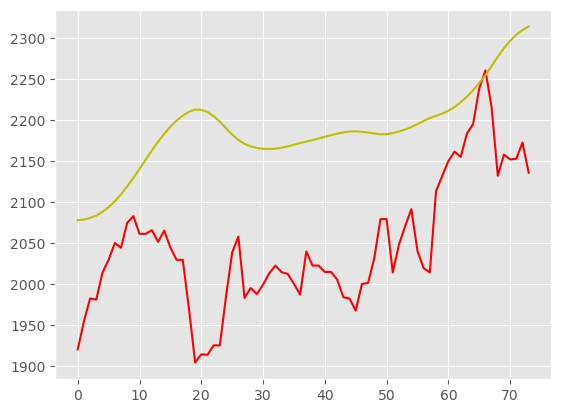

In [53]:
plt.plot(y_test1,color='r')
plt.plot(test_predict_val,color='y')

In [54]:
train_predict_val=model.predict(X_train)

7/7 [==============================] - 0s 30ms/step


In [55]:
train_predict_val=scaler.inverse_transform(train_predict_val)

In [56]:
trainPredict=np.empty_like(df1)
trainPredict[:,:]=np.nan
trainPredict[100:len(train_predict_val)+100,:]=train_predict_val

In [57]:
testPredict=np.empty_like(df1)
testPredict[:,:]=np.nan
testPredict[len(train_predict_val)+200+1:len(df1)-1,:]=test_predict_val

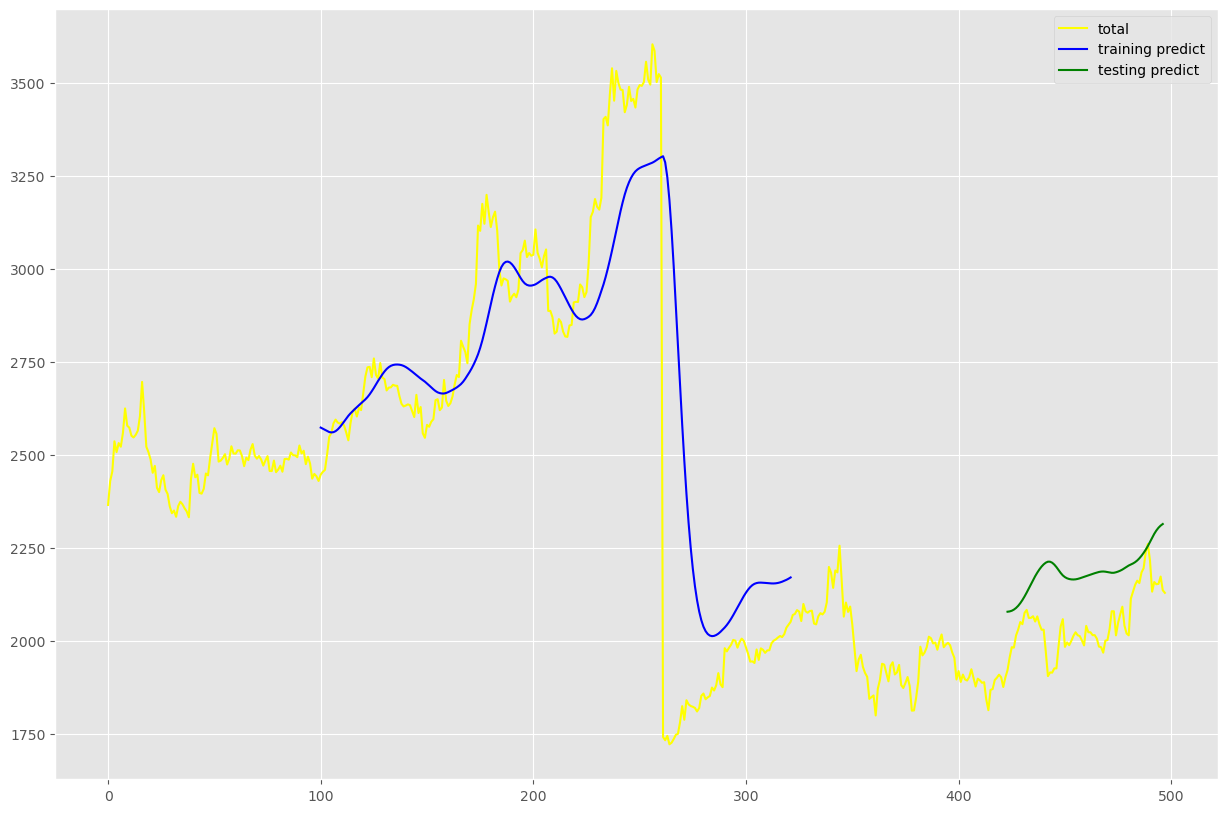

In [58]:
plt.figure(figsize=(15,10))
a=plt.plot(scaler.inverse_transform(df1),color='yellow')
b=plt.plot(trainPredict,'blue')
c=plt.plot(testPredict,'green')
plt.legend(['total','training predict','testing predict '])

In [59]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test1,test_predict_val))

154.54193380630286